<a href="https://colab.research.google.com/github/SaiPavankumar22/AluminiML/blob/main/AluminiumBilletPropertiesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
import joblib
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [57]:
data = pd.read_csv('wire_rod_casting_parameters.csv')

In [58]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_dt = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_linear = {}
param_grid_ridge = {'alpha': [0.1, 1, 10]}
param_grid_lasso = {'alpha': [0.1, 1, 10]}
models = {
    'SVR': (SVR(), param_grid_svm),
    'DecisionTree': (DecisionTreeRegressor(), param_grid_dt),
    'RandomForest': (RandomForestRegressor(), param_grid_rf),
    'GradientBoosting': (GradientBoostingRegressor(), param_grid_gb),
    'KNeighbors': (KNeighborsRegressor(), param_grid_knn),
    'LinearRegression': (LinearRegression(), param_grid_linear),
    'Ridge': (Ridge(), param_grid_ridge),
    'Lasso': (Lasso(), param_grid_lasso)
}

In [59]:
def find_best_model(X_train, y_train, X_test, y_test, target_name):
    best_model = None
    best_score = -float('inf')
    model_scores = []

    for model_name, (model, param_grid) in models.items():
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        score = grid_search.best_estimator_.score(X_test, y_test)
        mse = mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test))

        print(f"Model: {model_name}, Target: {target_name}, Best Params: {grid_search.best_params_}, Score: {score}, MSE: {mse}")

        model_scores.append((model_name, score, mse))

        if score > best_score:
            best_score = score
            best_model = grid_search.best_estimator_

    print(f"\nBest model for {target_name}: {type(best_model).__name__} with score: {best_score}\n")

    # Visualization of model comparison
    model_scores = sorted(model_scores, key=lambda x: x[2])  # Sort by MSE
    model_names, scores, mses = zip(*model_scores)

    plt.figure(figsize=(10, 6))
    plt.barh(model_names, mses, color='skyblue')
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Models')
    plt.title(f'Model Comparison for {target_name}')
    plt.gca().invert_yaxis()
    plt.show()

    return best_model

In [60]:
X = data.drop(columns=['UTS_MPa', 'Elongation_percent', 'Conductivity_IACS'])

Ultimate Tensile Strength Model

In [61]:
y_uts = data['UTS_MPa']

In [62]:
X_train, X_test, y_uts_train, y_uts_test = train_test_split(X, y_uts, test_size=0.2, random_state=42)

Model: SVR, Target: UTS, Best Params: {'C': 1, 'kernel': 'linear'}, Score: 0.9942842818137027, MSE: 0.39462534034327734
Model: DecisionTree, Target: UTS, Best Params: {'max_depth': 10, 'min_samples_split': 2}, Score: 0.9780536686377517, MSE: 1.515221394902933
Model: RandomForest, Target: UTS, Best Params: {'max_depth': 15, 'n_estimators': 200}, Score: 0.9935112022134608, MSE: 0.4480004002070158
Model: GradientBoosting, Target: UTS, Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, Score: 0.9965629306019866, MSE: 0.2373025815419231
Model: KNeighbors, Target: UTS, Best Params: {'n_neighbors': 7}, Score: 0.9514098043568151, MSE: 3.354770453695114
Model: LinearRegression, Target: UTS, Best Params: {}, Score: 0.9942901408891676, MSE: 0.3942208173115134
Model: Ridge, Target: UTS, Best Params: {'alpha': 0.1}, Score: 0.9942889306753753, MSE: 0.39430437304573324
Model: Lasso, Target: UTS, Best Params: {'alpha': 0.1}, Score: 0.9936387665721895, MSE: 0.43919308556374126

Best model for UT

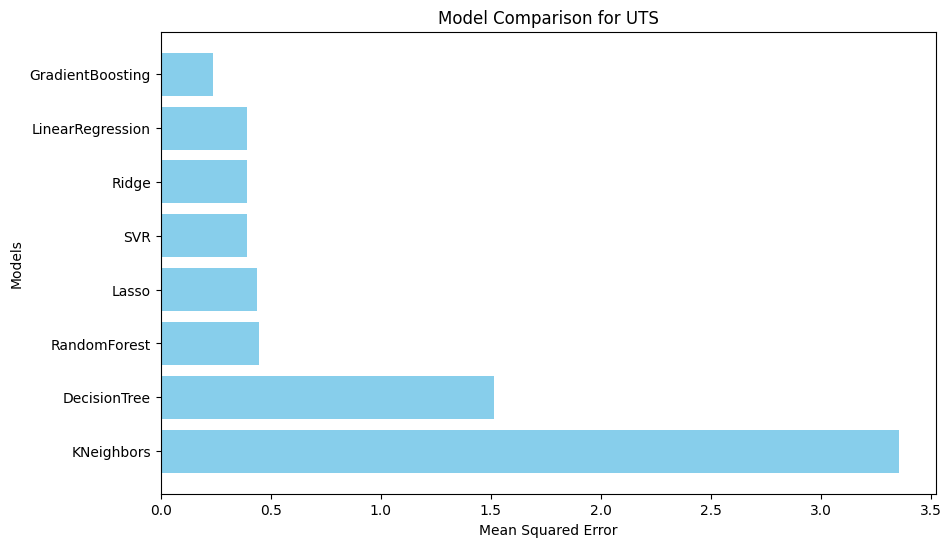

In [63]:
best_model_uts = find_best_model(X_train, y_uts_train, X_test, y_uts_test, "UTS")

In [64]:
y_uts_pred = best_model_uts.predict(X_test)
accuracy_uts = best_model_uts.score(X_test, y_uts_test)

In [65]:
y_uts_pred

array([207.91856358, 185.37571494, 194.62644909, 198.56442252,
       209.36015988, 208.65505453, 196.00254192, 203.93734613,
       193.74716862, 200.3933986 , 186.33502311, 195.50451125,
       202.88242859, 190.55232355, 190.87370928, 194.37907751,
       196.19133146, 208.70918124, 186.70071171, 199.88657772,
       190.09290623, 207.34349436, 192.33254123, 187.95298691,
       207.32011202, 196.16046685, 179.82765032, 186.32710963,
       187.20942358, 201.63142445, 199.06079263, 199.1316238 ,
       207.79308387, 207.79369303, 202.50821215, 207.81263085,
       206.61206672, 209.32941909, 193.05202831, 188.20817909,
       196.80894104, 189.43714712, 195.47606458, 194.25073824,
       201.07443902, 198.90135669, 187.07437413, 200.67485165,
       189.10437464, 199.91444735, 190.92409892, 181.77968335,
       188.16449535, 206.44827386, 207.95576556, 208.08895372,
       202.86217455, 184.70288851, 200.80922708, 201.57144343,
       193.57983326, 184.76171505, 195.96852834, 195.50

In [66]:
accuracy_uts

0.9965629306019866

Elongation percentage model

In [67]:
y_elongation = data['Elongation_percent']

In [68]:
X_train, X_test, y_elongation_train, y_elongation_test = train_test_split(X, y_elongation, test_size=0.2, random_state=42)

Model: SVR, Target: Elongation, Best Params: {'C': 0.1, 'kernel': 'linear'}, Score: 0.9845682803549338, MSE: 0.02688423008235043
Model: DecisionTree, Target: Elongation, Best Params: {'max_depth': 15, 'min_samples_split': 5}, Score: 0.9894432506444232, MSE: 0.01839134491325283
Model: RandomForest, Target: Elongation, Best Params: {'max_depth': 15, 'n_estimators': 200}, Score: 0.9956147117817813, MSE: 0.007639790000572433
Model: GradientBoosting, Target: Elongation, Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, Score: 0.9986029943761358, MSE: 0.0024337806467546346
Model: KNeighbors, Target: Elongation, Best Params: {'n_neighbors': 7}, Score: 0.9886921339872508, MSE: 0.019699895968777487
Model: LinearRegression, Target: Elongation, Best Params: {}, Score: 0.9848291477706046, MSE: 0.02642976228581273
Model: Ridge, Target: Elongation, Best Params: {'alpha': 0.1}, Score: 0.9848279612248335, MSE: 0.026431829415740345
Model: Lasso, Target: Elongation, Best Params: {'alpha': 0.1}, 

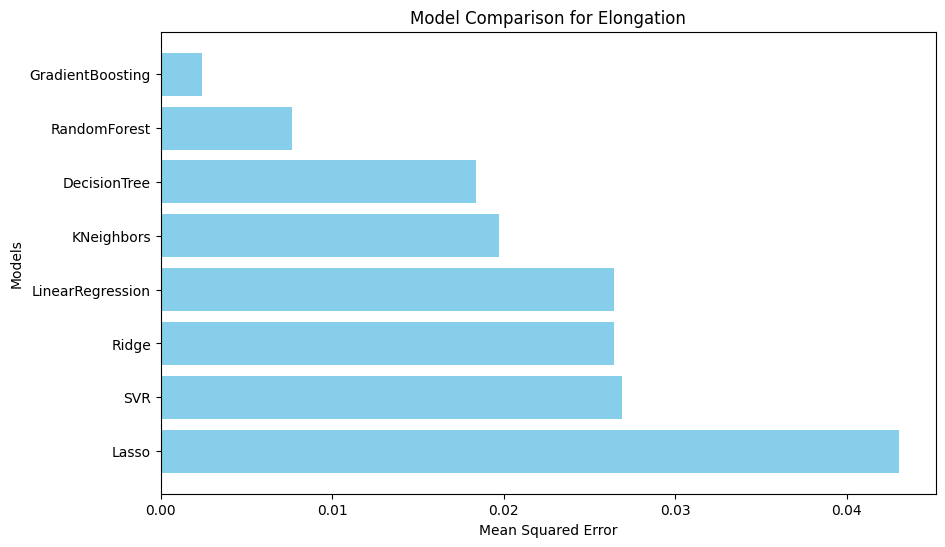

In [69]:
best_model_elongation = find_best_model(X_train, y_elongation_train, X_test, y_elongation_test, "Elongation")

In [70]:
y_elongation_pred = best_model_elongation.predict(X_test)
accuracy_elongation = best_model_elongation.score(X_test, y_elongation_test)

In [71]:
y_elongation_pred

array([21.97418017, 18.4526152 , 19.85157973, 20.65356928, 21.99484274,
       21.98195127, 20.49695838, 21.64279296, 19.73518375, 20.53038978,
       18.31117203, 19.45154403, 21.50954716, 19.28189962, 19.48234864,
       20.1022414 , 19.64470988, 21.99095101, 18.61382964, 20.49803569,
       19.46968822, 21.91356818, 19.50722078, 18.39203398, 21.9630329 ,
       20.1216244 , 17.96296135, 18.6472734 , 18.88908107, 21.30237808,
       20.51171374, 20.73745754, 22.00667029, 22.01592643, 21.3011885 ,
       21.89202519, 21.84347631, 21.98418644, 19.08770917, 18.68405987,
       19.89845292, 19.11736289, 19.96645884, 19.78626161, 20.7995159 ,
       20.35906315, 18.60069465, 20.22871315, 19.04449866, 20.50748564,
       19.00810818, 18.12657135, 18.94456804, 21.39778789, 21.98372382,
       21.98490169, 20.9310486 , 18.72057539, 21.20026837, 21.24712383,
       19.6994165 , 18.2374471 , 20.20899674, 19.67278548, 22.00418053,
       19.26096721, 19.7711105 , 18.58714758, 20.60147317, 20.92

In [72]:
accuracy_elongation

0.9986029943761358

Conductivity Model

In [73]:
y_conductivity = data['Conductivity_IACS']

In [74]:
X_train, X_test, y_conductivity_train, y_conductivity_test = train_test_split(X, y_conductivity, test_size=0.2, random_state=42)

Model: SVR, Target: Conductivity, Best Params: {'C': 0.1, 'kernel': 'linear'}, Score: 0.9977347594562673, MSE: 0.018222577197206772
Model: DecisionTree, Target: Conductivity, Best Params: {'max_depth': 15, 'min_samples_split': 10}, Score: 0.9919046534781819, MSE: 0.06512247776074509
Model: RandomForest, Target: Conductivity, Best Params: {'max_depth': 10, 'n_estimators': 200}, Score: 0.9967180602046313, MSE: 0.02640134684290246
Model: GradientBoosting, Target: Conductivity, Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, Score: 0.9984383688265888, MSE: 0.012562438320196639
Model: KNeighbors, Target: Conductivity, Best Params: {'n_neighbors': 7}, Score: 0.9920512165444704, MSE: 0.06394346090220863
Model: LinearRegression, Target: Conductivity, Best Params: {}, Score: 0.9977534292305535, MSE: 0.01807238943718009
Model: Ridge, Target: Conductivity, Best Params: {'alpha': 10}, Score: 0.9977528022031884, MSE: 0.018077433517199433
Model: Lasso, Target: Conductivity, Best Params: {'

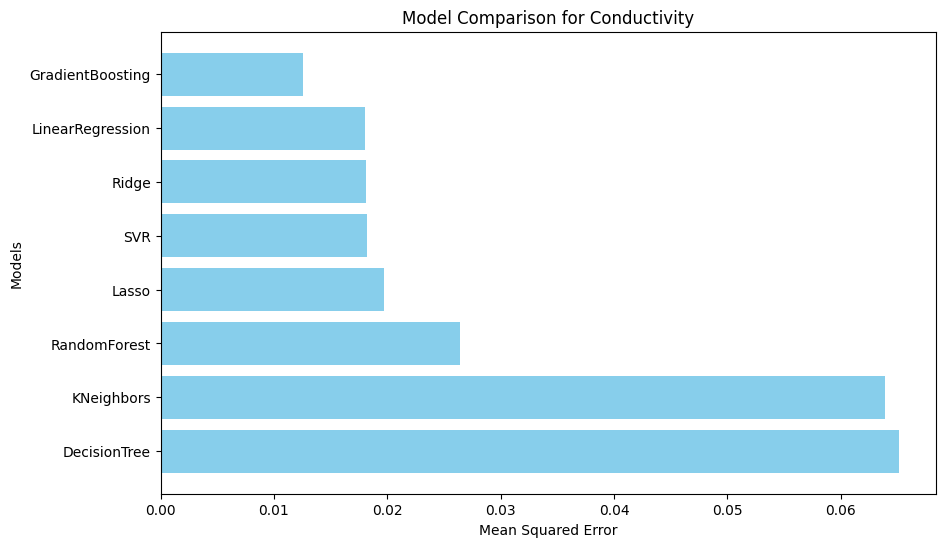

In [75]:
best_model_conductivity = find_best_model(X_train, y_conductivity_train, X_test, y_conductivity_test, "Conductivity")

In [76]:
y_conductivity_pred = best_model_conductivity.predict(X_test)
accuracy_conductivity = best_model_conductivity.score(X_test, y_conductivity_test)

In [77]:
y_conductivity_pred

array([65.05805936, 56.91009339, 59.51358602, 61.17959684, 64.65578759,
       65.07769514, 61.46961041, 62.80436016, 58.78716504, 60.33229576,
       56.30305682, 58.19841434, 63.36525212, 59.22956122, 59.42539569,
       60.38993299, 59.48900519, 65.04208029, 56.44226508, 60.78534582,
       58.93645606, 63.44494186, 58.92021025, 55.6422984 , 63.87975711,
       59.64911611, 56.40954494, 57.02563818, 58.16633112, 62.72051468,
       60.44193857, 61.75694318, 64.5011138 , 64.45500815, 62.59416118,
       63.85597751, 63.18564259, 64.97311725, 57.70338978, 57.47201416,
       59.44431259, 58.84756039, 59.95641426, 59.40497227, 62.21998926,
       59.9615705 , 56.61642369, 59.57638166, 58.75494013, 60.77514602,
       57.25699625, 56.6465341 , 58.18965412, 61.97899158, 64.39235714,
       65.12738223, 62.1580546 , 57.20026116, 62.39589468, 62.79650577,
       59.87249698, 56.66038883, 60.62524299, 59.01573277, 64.89473956,
       58.01561821, 59.60736928, 56.81225325, 61.5079942 , 61.16

In [78]:
accuracy_conductivity

0.9984383688265888

In [79]:
def predict_new_values():
    print("\nEnter the following values for prediction:")
    features = []
    for col in X.columns:
        value = float(input(f"Enter {col}: "))
        features.append(value)
    input_data = pd.DataFrame([features], columns=X.columns)
    uts_pred = best_model_uts.predict(input_data)
    elongation_pred = best_model_elongation.predict(input_data)
    conductivity_pred = best_model_conductivity.predict(input_data)
    print("calculating........")
    print(f"Predicted UTS (MPa): {uts_pred[0]}")
    print(f"Predicted Elongation (%): {elongation_pred[0]}")
    print(f"Predicted Conductivity (% IACS): {conductivity_pred[0]}")

In [80]:
predict_new_values()


Enter the following values for prediction:
Enter Casting_Temp_C: 4
Enter Cooling_Water_Temp_C: 5
Enter Casting_Speed_m_per_min: 6
Enter Cast_Bar_Entry_Temp_C: 7
Enter Emulsion_Temp_C: 8
Enter Emulsion_Pressure_bar: 9
Enter Emulsion_Concentration_percent: 4
Enter Rod_Quench_Water_Pressure_bar: 3
calculating........
Predicted UTS (MPa): 209.90864424620094
Predicted Elongation (%): 21.992907573032532
Predicted Conductivity (% IACS): 64.8073758506067


In [81]:
joblib.dump(best_model_uts, 'best_model_uts.pkl')
joblib.dump(best_model_elongation, 'best_model_elongation.pkl')
joblib.dump(best_model_conductivity, 'best_model_conductivity.pkl')

['best_model_conductivity.pkl']